# Analisando as vendas de carros da Empresa X

In [2]:
!pip install seaborn
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
vendas_carros = pd.read_csv('C:/Users/daniel.montanari/Desktop/Project Data Science/datasets/empresa_x.csv')
vendas_carros

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63
5,2017-06-30,81
6,2017-07-31,101
7,2017-08-31,124
8,2017-09-30,148
9,2017-10-31,174


In [4]:
ajuste_col = {
    'mes' : 'Mês',
    'vendas' : 'Vendas'
}

vendas_carros = vendas_carros.rename(columns = ajuste_col)

In [5]:
vendas_carros.dtypes

Mês       object
Vendas     int64
dtype: object

In [7]:
# Convertendo a coluna 'mes' para datetime:

vendas_carros['Mês'] = pd.to_datetime(vendas_carros['Mês'])
vendas_carros.dtypes

Mês       datetime64[ns]
Vendas             int64
dtype: object

## Analisando visualmente as vendas

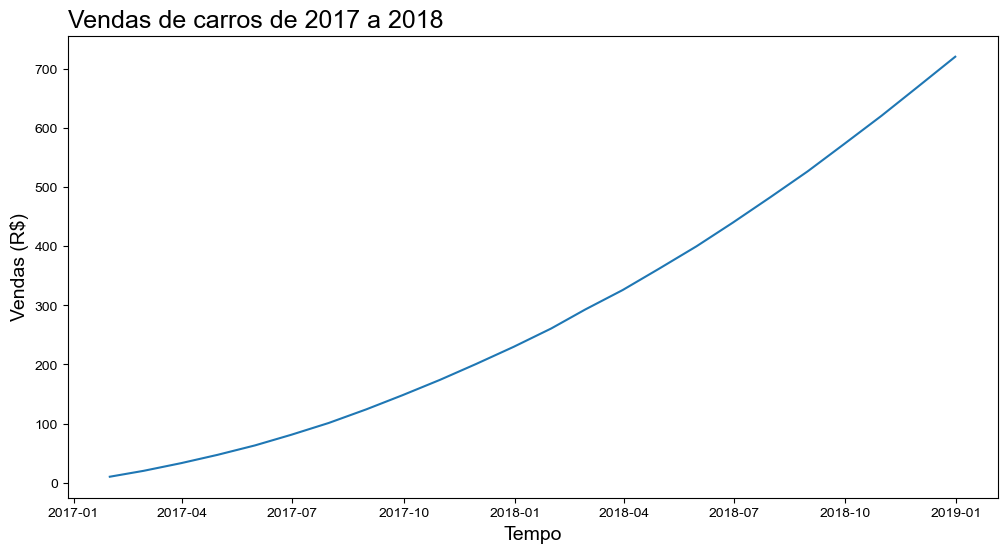

In [8]:
# As vendas estão descritivamente e visualmente aumentando conforme os meses

def grafico_lineplot(titulo, labelx, labely, x, y, dataset):
    ax = sns.lineplot(x = x, y = y, data = dataset)
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc = 'left', fontsize = 18)
    ax.set_xlabel(labelx, fontsize = 14)
    ax.set_ylabel(labely, fontsize = 14)
    ax = ax
    
grafico_lineplot('Vendas de carros de 2017 a 2018', 'Tempo', 'Vendas (R$)',
                'Mês', 'Vendas', vendas_carros)

## Analisando visualmente o aumento das vendas

In [9]:
# Decompondo os números das vendas

vendas_carros['Aumento'] = vendas_carros['Vendas'].diff()
vendas_carros

,Mês,Vendas,Aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0
5,2017-06-30,81,18.0
6,2017-07-31,101,20.0
7,2017-08-31,124,23.0
8,2017-09-30,148,24.0
9,2017-10-31,174,26.0


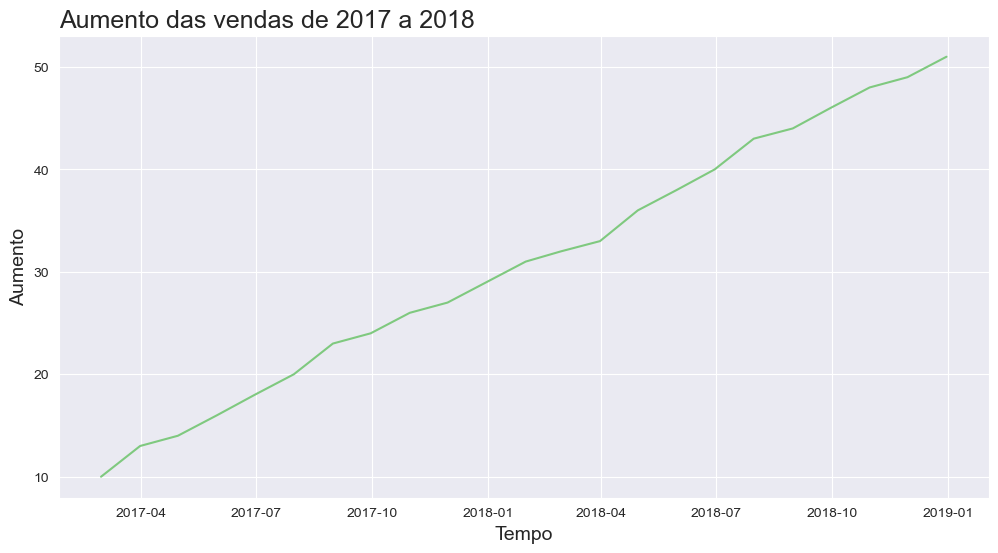

In [10]:
grafico_lineplot('Aumento das vendas de 2017 a 2018', 'Tempo', 'Aumento',
                'Mês', 'Aumento', vendas_carros)

## Analisando visualmente a aceleração das vendas

In [180]:
vendas_carros['Aceleração'] = vendas_carros['Aumento'].diff()
vendas_carros

,Mês,Vendas,Aumento,Aceleração
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0
5,2017-06-30,81,18.0,2.0
6,2017-07-31,101,20.0,2.0
7,2017-08-31,124,23.0,3.0
8,2017-09-30,148,24.0,1.0
9,2017-10-31,174,26.0,2.0


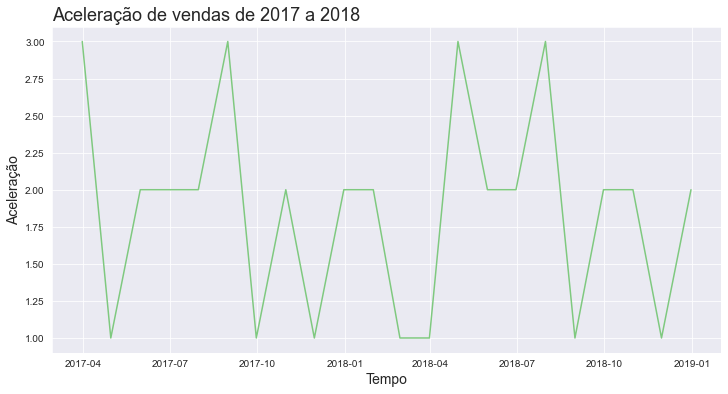

In [181]:
grafico_lineplot('Aceleração de vendas de 2017 a 2018', 'Tempo', 'Aceleração', 
                 'Mês', 'Aceleração', vendas_carros)

## Comparando as plotagens

In [182]:
def group_plot(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize = (16, 12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, fontsize = 18, loc = 'left')
    sns.lineplot(x = x, y = y1, data = dataset)
    plt.subplot(3, 1, 2)
    sns.lineplot(x = x, y = y2, data = dataset)
    plt.subplot(3, 1, 3)
    sns.lineplot(x = x, y = y3, data = dataset)
    ax = ax

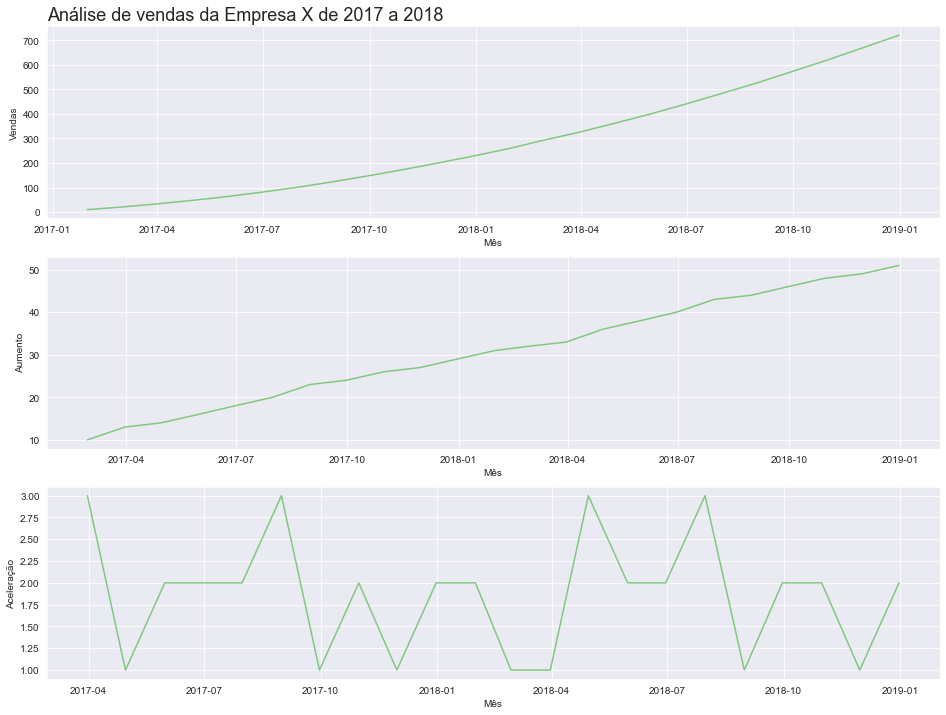

In [183]:
# Em nenhum momento as vendas tiveram queda

group_plot('Mês', 'Vendas', 'Aumento', 'Aceleração', vendas_carros,
           'Análise de vendas da Empresa X de 2017 a 2018')

## Autocorrelação

In [184]:
from pandas.plotting import autocorrelation_plot

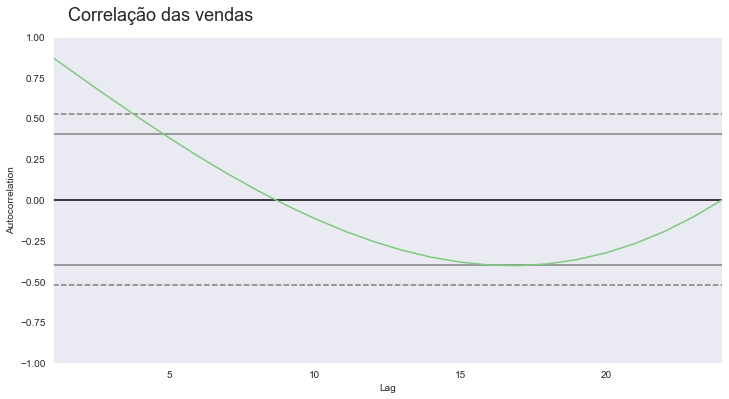

In [185]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação das vendas', fontsize = 18, x = 0.25, y = 0.95)
autocorrelation_plot(vendas_carros['Vendas'])
ax = ax

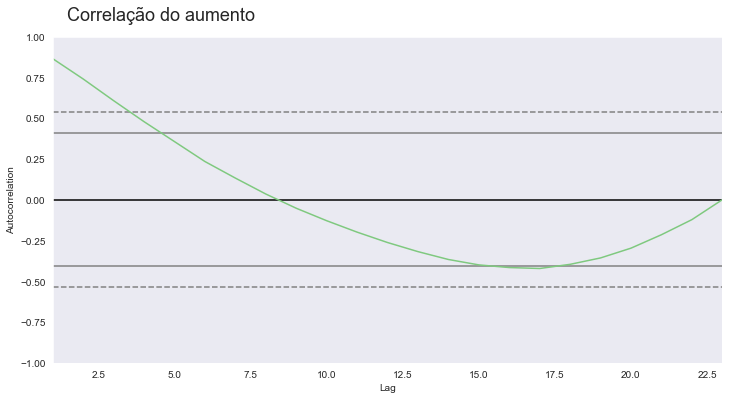

In [186]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação do aumento', fontsize = 18, x = 0.25, y = 0.95)
autocorrelation_plot(vendas_carros['Aumento'][1:])
ax = ax

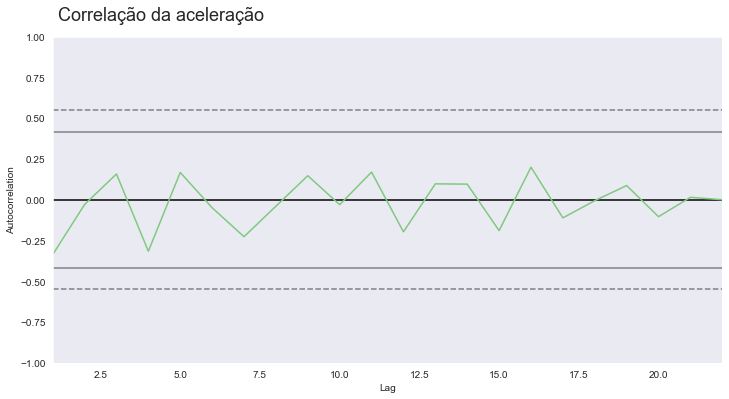

In [187]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação da aceleração', fontsize = 18, x = 0.25, y = 0.95)
autocorrelation_plot(vendas_carros['Aceleração'][2:])
ax = ax